# Assignment 3

## Q1 Default Network

In [17]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
x_train = pd.read_csv('FashionMNISTwithaTwistW25/x_train.csv', header=None).values
x_test = pd.read_csv('FashionMNISTwithaTwistW25/x_test.csv', header=None).values
y_train = pd.read_csv('FashionMNISTwithaTwistW25/y_train.csv', header=None).values
y_test = pd.read_csv('FashionMNISTwithaTwistW25/y_test.csv', header=None).values

### Handling data

In [3]:
x_train_reshaped = x_train.reshape(-1 , 28, 28, 1).astype('float32') / 255.0
x_test_reshaped = x_test.reshape(-1 , 28, 28, 1).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=5)
y_test = keras.utils.to_categorical(y_test, num_classes=5)

### Building the CNN

In [4]:
def build_cnn():
	model = keras.Sequential([
		layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), strides=1, padding='same', activation='relu'),
		layers.MaxPooling2D((2, 2)),
		layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'),
		layers.Flatten(),
		layers.Dense(512, activation='relu'),
		layers.Dense(5, activation='softmax')
	])

	model.compile(
		optimizer=keras.optimizers.SGD(),
		loss='categorical_crossentropy',
		metrics=['accuracy']	
	)

	return model

model = build_cnn()
model.summary()

c:\Users\peada\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,223,909 (12.30 MB)

 Trainable params: 3,223,909 (12.30 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [5]:
trained_model_q1 = model.fit(x_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7839 - loss: 0.5859 - val_accuracy: 0.9253 - val_loss: 0.2203
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9478 - loss: 0.1714 - val_accuracy: 0.9546 - val_loss: 0.1434
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9566 - loss: 0.1411 - val_accuracy: 0.9596 - val_loss: 0.1276
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9633 - loss: 0.1189 - val_accuracy: 0.9641 - val_loss: 0.1182
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9665 - loss: 0.1076 - val_accuracy: 0.9648 - val_loss: 0.1120
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9684 - loss: 0.1033 - val_accuracy: 0.9663 - val_loss: 0.1032
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9710 - loss: 0.0932 - val_accuracy: 0.9699 - val_loss: 0.0997
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9725 - loss: 0.0910 - v

#### Training and Validation Accuracy vs Epochs

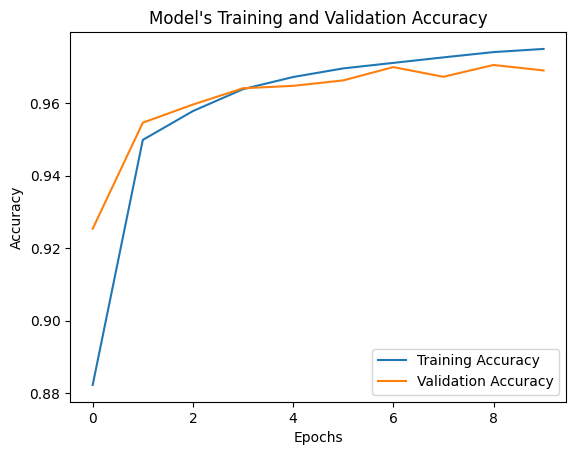

In [6]:
plt.plot(trained_model_q1.history['accuracy'], label='Training Accuracy')
plt.plot(trained_model_q1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model\'s Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Training and Validation Loss vs Epochs

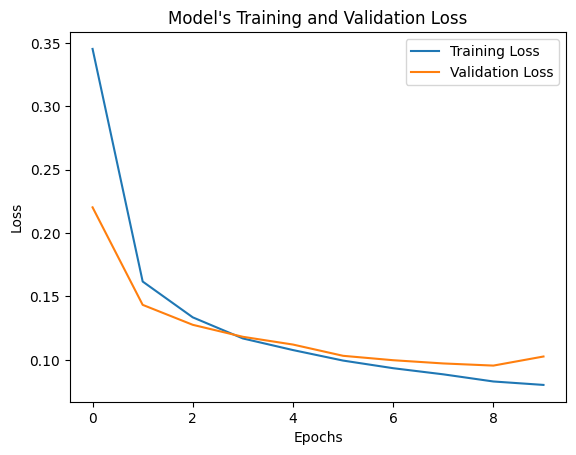

In [7]:
plt.plot(trained_model_q1.history['loss'], label='Training Loss')
plt.plot(trained_model_q1.history['val_loss'], label='Validation Loss')
plt.title('Model\'s Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evaluation of model

In [8]:
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9681 - loss: 0.1152
Test accuracy: 0.9681031703948975


## Q2 Your Own Improvements

In [9]:
x_train_q2, x_val_q2, y_train_q2, y_val_q2 = train_test_split(x_train_reshaped, y_train, test_size=0.2, random_state=42)

In [16]:
data_augmentation = ImageDataGenerator(
	rotation_range=15,
	width_shift_range=0.15,
	height_shift_range=0.15,
	shear_range=0.1,
	zoom_range=0.2,
	horizontal_flip=True,
)
data_augmentation.fit(x_train_q2)

In [35]:
def build_improved_cnn():
	model = keras.Sequential([
		layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), strides=1, padding='same', activation='relu'),
		layers.BatchNormalization(),
		layers.MaxPooling2D((2, 2)),
		layers.Dropout(0.25),

		layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),
		layers.BatchNormalization(),
		layers.MaxPooling2D((2, 2)),
		layers.Dropout(0.25),

		layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
		layers.BatchNormalization(),
		layers.MaxPooling2D((2, 2)),
		layers.Dropout(0.25),

		layers.Flatten(),
		layers.Dense(512, activation='relu'),
		layers.BatchNormalization(),
		layers.Dropout(0.5),
		layers.Dense(5, activation='softmax')
	])

	model.compile(
		optimizer=keras.optimizers.Adam(learning_rate=3e-4),
		loss='categorical_crossentropy',
		metrics=['accuracy']	
	)

	return model

improved_model = build_improved_cnn()
improved_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,556,229 (5.94 MB)

 Trainable params: 1,554,309 (5.93 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [36]:
improved_model_q2 = improved_model.fit(data_augmentation.flow(x_train_q2, y_train_q2, batch_size=32), epochs=20, validation_data=(x_val_q2, y_val_q2))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7863 - loss: 0.6621 - val_accuracy: 0.9595 - val_loss: 0.1280
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - accuracy: 0.9189 - loss: 0.2443 - val_accuracy: 0.9647 - val_loss: 0.1124
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 46ms/step - accuracy: 0.9383 - loss: 0.1876 - val_accuracy: 0.9605 - val_loss: 0.1058
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 46ms/step - accuracy: 0.9516 - loss: 0.1496 - val_accuracy: 0.9626 - val_loss: 0.1167
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 47ms/step - accuracy: 0.9515 - loss: 0.1464 - val_accuracy: 0.9725 - val_loss: 0.0818
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - accuracy: 0.9573 - loss: 0.1305 - val_accuracy: 0.9749 - val_loss: 0.0729
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 48ms/step - accuracy: 0.9604 - loss: 0.1203 - val_accuracy: 0.9741 - val_loss: 0.0710
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 73s 48ms/step - accuracy: 0.9641 -

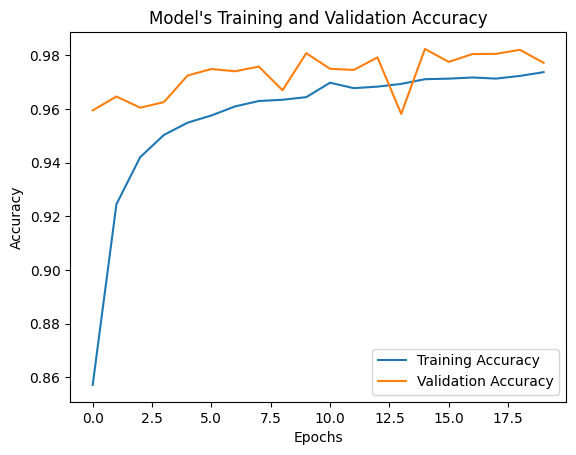

In [37]:
plt.plot(improved_model_q2.history['accuracy'], label='Training Accuracy')
plt.plot(improved_model_q2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model\'s Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

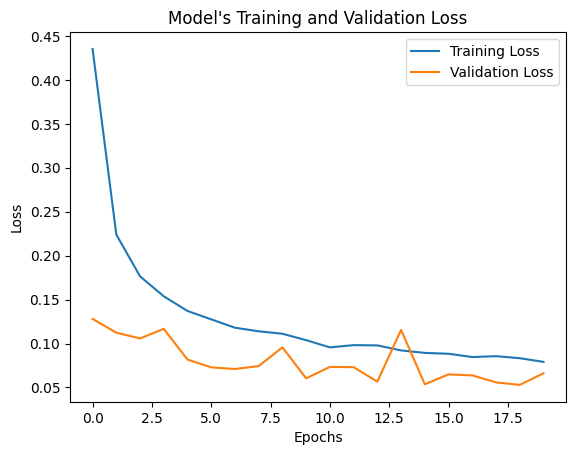

In [40]:
plt.plot(improved_model_q2.history['loss'], label='Training Loss')
plt.plot(improved_model_q2.history['val_loss'], label='Validation Loss')
plt.title('Model\'s Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
test_loss, test_acc = improved_model.evaluate(x_test_reshaped, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9779 - loss: 0.0734
Test accuracy: 0.977202296257019
